<a href="https://colab.research.google.com/github/ShinyQ/News_Classification-Tensorflow-LSTM/blob/main/News_Classification_Tensorflow_LTSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **News Classification**

Nama : Kurniadi Ahmad Wijaya

Email: kurniadiahmadwijaya@gmail.com 

In [ ]:
!pip install tweet-preprocessor
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import preprocessor as p 
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer

In [ ]:
!gdown --id 1rOc4vnxBqaLQr8D9OxvmjnajChQra0-M

Downloading...
From: https://drive.google.com/uc?id=1rOc4vnxBqaLQr8D9OxvmjnajChQra0-M
To: /content/train.csv
29.1MB [00:00, 136MB/s]


In [ ]:
df = pd.read_csv('train.csv')
df.sample(8)

,Class Index,Title,Description
101153,4,"New Year, New Scraps for Sun's Feisty Chief","Despite a recent antitrust settlement, Scott M..."
7483,1,Blast in Turkish Resort City Kills One,ISTANBUL (Reuters) - An explosion rocked Turk...
29498,1,U.S. Alarmed Over Suspected Iran Nuke Site,"VIENNA, Austria - A U.S. official expressed al..."
85276,3,"In Tussle With Murdoch, Malone Seeks Leverage","On the surface it is a simple stock purchase, ..."
71563,3,BellSouth Profit Drops on Flat Revenue,The phone provider reported a 14.6 percent dro...
58633,1,Car bomb explodes at Palestinian security HQ i...,"GAZA CITY, Oct 12 (AFP) - A car bomb exploded ..."
108827,2,Westwood #39;s card marked but not wrecked by ...,A double-bogey six on the treacherous 17th hol...
9700,4,Site Bars Black Box Voting Head,A politically progressive website at the foref...


In [ ]:
SIZE = 10000

df_business = df.loc[lambda df: df['Class Index'] == 3]
df_business = df_business.sample(SIZE)

df_world = df.loc[lambda df: df['Class Index'] == 2]
df_world = df_world.sample(SIZE)

df_sport = df.loc[lambda df: df['Class Index'] == 1	]
df_sport = df_sport.sample(SIZE)

df_tech = df.loc[lambda df: df['Class Index'] == 4	]
df_tech = df_tech.sample(SIZE)

In [ ]:
df = pd.concat([df_business, df_world, df_sport, df_tech])

In [ ]:
df

,Class Index,Title,Description
9559,3,Soft Margins Cut Bombardier Profit,MONTREAL (Reuters) - Second-quarter profit fe...
49202,3,Wall Street opens higher,WALL Street opened higher today on the heels o...
100723,3,Unlocking Value at Altria,"Plus, talking turkey with Hormel, a peek into ..."
79651,3,"Chrysler recalling 240,100 minivans","DETROIT - Chrysler is recalling 240,000 miniva..."
92685,3,Update 1: Motorola to Acquire MeshNetworks,"Motorola Inc. is acquiring MeshNetworks Inc., ..."
...,...,...,...
49107,4,Gluecode delivers open source BPM engine,Hoping to put in place the last missing piece ...
116223,4,Google Bets Big on Bringing Libraries to Web,SAN FRANCISCO (Reuters) - Google Inc. said on...
93494,4,Vivendi reports sizzling third-quarter profits...,AFP - Media and mobile telephone group Vivendi...
106721,4,mm02 To Bring I-Mode to Europe,mm02 UK and mm02 Ireland will use DoCoMo #39;s...


In [ ]:
df['Class Index'].value_counts()

4    10000
3    10000
2    10000
1    10000
Name: Class Index, dtype: int64

In [ ]:
print(f'Jumlah Data : {len(df)}')

Jumlah Data : 40000


## **Data Preprocessing**

### **Transforming Data Classification**

In [ ]:
def convert_class(x):
    if x == 1:
       classification = "World"
    elif x == 2:
       classification = "Sport"
    elif x == 3:
       classification = "Business" 
    else:
       classification = "Tech"       

    return classification

df['Class Index'] = df['Class Index'].apply(convert_class)
df['Class Index']

9559      Business
49202     Business
100723    Business
79651     Business
92685     Business
            ...   
49107         Tech
116223        Tech
93494         Tech
106721        Tech
23733         Tech
Name: Class Index, Length: 40000, dtype: object

### **One Hot Encoding**

In [ ]:
category = pd.get_dummies(df["Class Index"])
df = pd.concat([df, category], axis=1)
df = df.drop(columns='Class Index')
df = df.drop(columns='Title')
df.sample(8)

,Description,Business,Sport,Tech,World
28353,Schalke 04 coach Jupp Heynckes became the firs...,0,1,0,0
90820,AMR Research estimates that companies will spe...,1,0,0,0
27855,Oil ministers are meeting to consider raising ...,1,0,0,0
37100,LG.Philips LCD Co. Ltd. today reported that ma...,0,0,1,0
39899,WASHINGTON (Reuters) - What the U.S. Federal ...,1,0,0,0
84421,AP - Yasser Arafat's wife accused his top lieu...,0,0,0,1
46878,SALT LAKE CITY - Police found what appeared to...,0,0,0,1
95290,Consumers get psyched for the release of Ninte...,0,0,1,0


### **Cleaning Data**

In [ ]:
def preprocessing_data(x):
    return p.clean(x)
    
df['Description'] = df['Description'].apply(preprocessing_data)
df['Description']

9559      MONTREAL (Reuters) - Second-quarter profit fel...
49202     WALL Street opened higher today on the heels o...
100723    Plus, talking turkey with Hormel, a peek into ...
79651     DETROIT - Chrysler is recalling minivans becau...
92685     Motorola Inc. is acquiring MeshNetworks Inc., ...
                                ...                        
49107     Hoping to put in place the last missing piece ...
116223    SAN FRANCISCO (Reuters) - Google Inc. said on ...
93494     AFP - Media and mobile telephone group Vivendi...
106721    mm02 UK and mm02 Ireland will use DoCoMo i-mod...
23733     While attention deficit-hyperactivity disorder...
Name: Description, Length: 40000, dtype: object

### **Stemming Data**

In [ ]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

df['Description'] = df['Description'].apply(stemming_data)
df['Description']

9559      montreal (reuters) - second-quarter profit fel...
49202     wall street opened higher today on the heels o...
100723    plus, talking turkey with hormel, a peek into ...
79651     detroit - chrysler is recalling minivans becau...
92685     motorola inc. is acquiring meshnetworks inc., ...
                                ...                        
49107     hoping to put in place the last missing piece ...
116223    san francisco (reuters) - google inc. said on ...
93494     afp - media and mobile telephone group vivendi...
106721    mm02 uk and mm02 ireland will use docomo i-mod...
23733     while attention deficit-hyperactivity disorder...
Name: Description, Length: 40000, dtype: object

### **Split Training And Validation Data**

In [ ]:
description = df['Description'].values
labels = df[['Business', 'Sport', 'Tech', 'World']]

x_train, x_test, y_train, y_test = train_test_split(description, labels, test_size=0.2, random_state=42)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print('---------------------------------\n')
print(y_train.value_counts(), end="\n\n")
print(y_test.value_counts())

x_train shape: (32000,)
x_test shape: (8000,)
---------------------------------
y_train shape: (32000, 4)
y_test shape: (8000, 4)
---------------------------------

Business  Sport  Tech  World
0         1      0     0        8033
          0      0     1        8014
                 1     0        8000
1         0      0     0        7953
dtype: int64

Business  Sport  Tech  World
1         0      0     0        2047
0         0      1     0        2000
                 0     1        1986
          1      0     0        1967
dtype: int64


### **Tokenizing**

In [ ]:
tokenizer = Tokenizer(num_words=20000, oov_token='OOV')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)

seq_train = tokenizer.texts_to_sequences(x_train)
seq_test = tokenizer.texts_to_sequences(x_test)
 
pad_train = pad_sequences(seq_train) 
pad_test = pad_sequences(seq_test)

### **Embedding**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=20000, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 32)          640000    
_________________________________________________________________
lstm_19 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dense_57 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 260       
Total params: 681,668
Trainable params: 681,668
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(
    restore_best_weights=True,
    patience=5, 
    min_delta=0.01, 
    monitor='val_loss'
)

In [ ]:
history = model.fit(
    pad_train, y_train, 
    epochs=20, 
    validation_data=(pad_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/20
1000/1000 - 75s - loss: 0.5544 - accuracy: 0.7753 - val_loss: 0.3686 - val_accuracy: 0.8759
Epoch 2/20
1000/1000 - 75s - loss: 0.2506 - accuracy: 0.9185 - val_loss: 0.3726 - val_accuracy: 0.8794
Epoch 3/20
1000/1000 - 70s - loss: 0.1609 - accuracy: 0.9495 - val_loss: 0.4032 - val_accuracy: 0.8774
Epoch 4/20
1000/1000 - 69s - loss: 0.1079 - accuracy: 0.9658 - val_loss: 0.5039 - val_accuracy: 0.8726
Epoch 5/20
1000/1000 - 67s - loss: 0.0681 - accuracy: 0.9784 - val_loss: 0.5928 - val_accuracy: 0.8651
Epoch 6/20
1000/1000 - 66s - loss: 0.0471 - accuracy: 0.9837 - val_loss: 0.6853 - val_accuracy: 0.8670


## **Result**

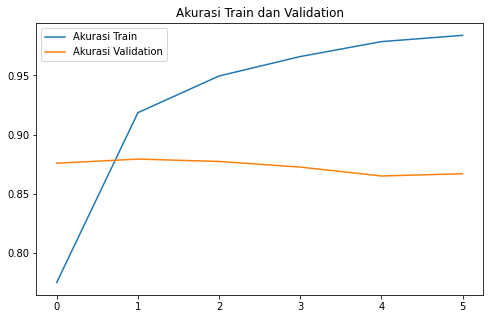

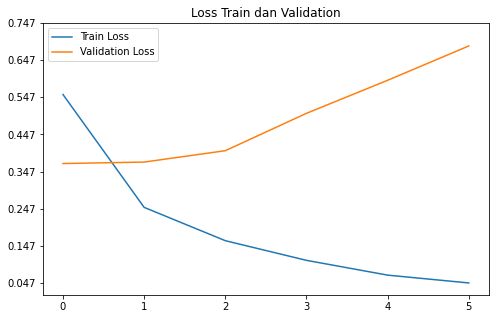

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, label='Akurasi Train')
plt.plot(epochs, val_acc, label='Akurasi Validation')
plt.title('Akurasi Train dan Validation')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss Train dan Validation')
plt.yticks(np.arange(min(loss), max(val_loss)+0.1, 0.1))
plt.legend()
plt.show()

In [ ]:
print(f'Akurasi Maksimum : {max(acc)}')
print(f'Validasi Maksimum : {max(val_acc)}')

Akurasi Maksimum : 0.983718752861023
Validasi Maksimum : 0.8793749809265137
